In [5]:
from os import path

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set()

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [6]:
filename = 'dataset.h5'
keyname = '20simpleHam_noise'
filepath = path.abspath(path.join(path.abspath(''), "..", "..", f"main/data/{filename}"))
dataset = pd.read_hdf(filepath, keyname)

In [7]:
X, y = np.array(dataset["spectrum"].tolist()), np.array(
    [dataset["aFieldStrength"].tolist(), dataset["b"].tolist(), dataset["c"].tolist()])

# only scale parameters not spectra
sc0, sc1, sc2 = StandardScaler().fit(y[0].reshape(-1, 1)), StandardScaler().fit(
    y[1].reshape(-1, 1)), StandardScaler().fit(y[2].reshape(-1, 1))
# concatenate scaled parameters and split into training and test set
y = np.array([sc0.transform(y[0].reshape(-1, 1)), sc1.transform(y[1].reshape(-1, 1)),
              sc2.transform(y[2].reshape(-1, 1))]).T.reshape(-1, 3)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [17]:
# Evaluate Model on Test Set
y_pred = regressor.predict(X_test)
absoluteerror = y_pred-y_test
print(np.mean(abs(absoluteerror)))
print(np.std(abs(absoluteerror)))

0.38942055294580025
1.468249023714428
40.89328922025251


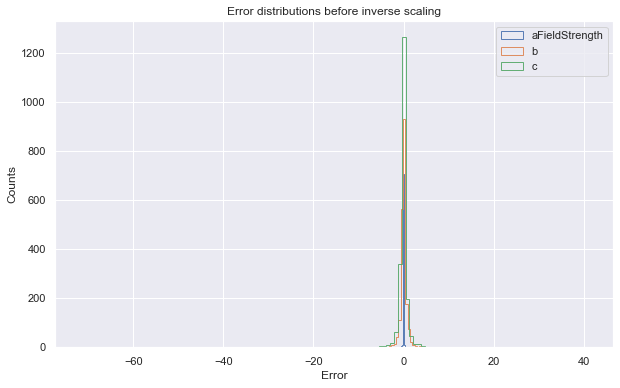

In [10]:
plt.figure(figsize=(10,6), facecolor='white')
plt.hist(absoluteerror.T[0],bins=100,alpha = 0.9,label = 'aFieldStrength',histtype = 'step')
plt.hist(absoluteerror.T[1],bins=100,alpha = 0.9,label = 'b',histtype = 'step')
plt.hist(absoluteerror.T[2],bins=100,alpha = 0.9,label = 'c',histtype = 'step')

plt.title('Error distributions before inverse scaling')
plt.xlabel('Error')
plt.ylabel('Counts')
plt.legend()
plt.show()

In [19]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred,multioutput='raw_values')

array([ 0.98050444, -0.99917387, -3.99083179])

<Figure size 720x432 with 0 Axes>

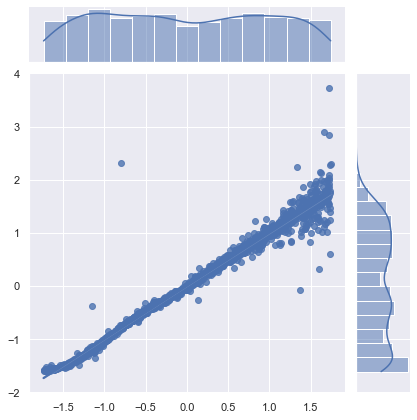

<Figure size 720x432 with 0 Axes>

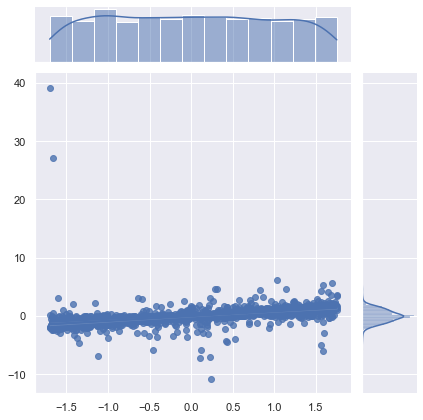

<Figure size 720x432 with 0 Axes>

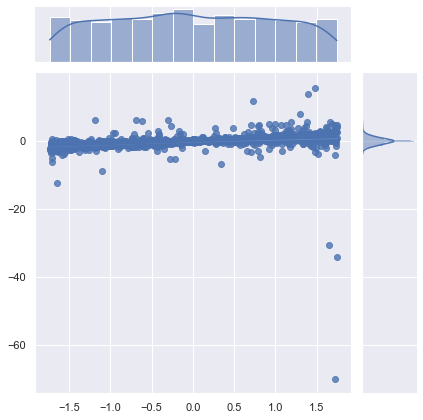

In [12]:
# Value against Error
for i in range(3):
    plt.figure(figsize=(10,6), facecolor='white')
    sns.jointplot(x=y_test[:,i],y = y_pred[:,i], kind="reg", truncate=True,)
    plt.show()